## 용어
- p값(p-value): 귀무가설을 구체화한 기회 모델이 주어졌을 때 관측된 결과와 같이 특이하거나 극단적인 결과를 얻을 확률
- 유의수준(alpha): 실제 결과가 통계적으로 의미 있는 것으로 간주되기 위해서, 우연에 의한 결과가 능가해야 '비정상적인' 가능성의 임계 확률
- 제 1종 오류: 우연에 의한 효과를 실제 효과라고 잘못 결론 내리는 것
- 제 2종 오류:  실제 효과를 우연에 의한 효과라고 잘못 결론 내리는 것

##  p값

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt
import seaborn as sns

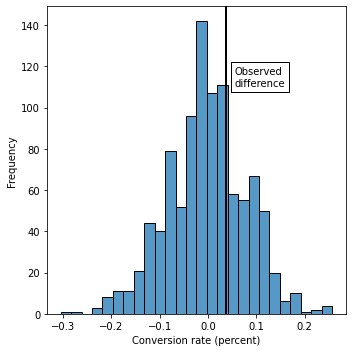

In [2]:
# 순열 검정
t_A = 23739 # 가격 A를 사용한 전체 사람수
c_A = 200 # 가격 A를 사용한 사람중 전환한 사람의수
t_B = 22588
c_B = 182

# 두 가격의 전환률 차이
obs_pct_diff = 100*(c_A/t_A - c_B/t_B)

conversion = [0]*(t_A+t_B-c_A-c_B)
conversion = conversion + [1]*(c_A+c_B)
conversion = pd.Series(conversion)

def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB)) # 비복원 추출
    idx_A = set(range(n)) - idx_B
    return x.loc[idx_B].mean() - x.loc[idx_A].mean()

perm_diffs = [100*perm_fun(conversion, t_A, t_B) for _ in range(1000)]
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(data=perm_diffs, ax=ax)
ax.axvline(x=obs_pct_diff, color='black', linewidth=2)
ax.text((obs_pct_diff)*1.5, 120, s='Observed\ndifference', va='top', bbox={'facecolor':'white'})
ax.set_xlabel('Conversion rate (percent)')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [3]:
# p값(우연히 얻은 결과가 실제 관측된 결과보다 크거나 같을 확률)
np.mean([diff > obs_pct_diff for diff in perm_diffs])

0.315

In [4]:
# 가설이 이항분포를 따르기 때문에 p값 근사 가능(정규근사법)
chi2, p_value, df, _ = stats.chi2_contingency([[c_A, t_A-c_A], [c_B, t_B-c_B]])

print(f'p-value for single sided test: {p_value / 2:.4f}') # 2를 나눠주는것은 단측 검정이기 때문에

p-value for single sided test: 0.3498
